# **01. Neural Network Regression with TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).

Predict the coordinates of a bounding box of an item in an image.

Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how we can take a sample of inputs (form our data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.




# What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:

Architecture of a regression model

Input shapes and output shapes

X: features/data (inputs)
y: labels (outputs)
Creating custom data to view and fit Steps in modelling

Creating a model
Compiling a model
    Defining a loss function
    Setting up an optimizer
    Creating evaluation metrics
Fitting a model (getting it to find patterns in our data)
Evaluating a model

Visualizng the model ("visualize, visualize, visualize")
Looking at training curves
Compare predictions to ground truth (using our evaluation metrics)
Saving a model (so we can use it later) Loading a model

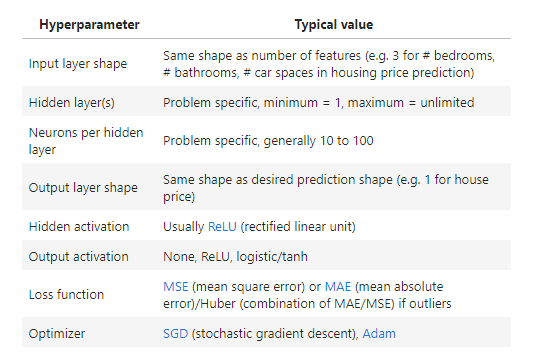

🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


# Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

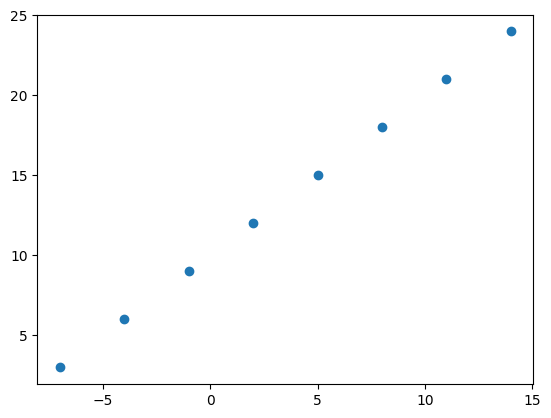

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it

plt.scatter(x,y)

In [ ]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
x=x+10
x,y

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

# **Regression input shapes and output shapes**

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of our data that goes into the model.

The output shape is the shape of our data we want to come out of our model.

These will differ depending on the problem working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [ ]:
# Example input & output shapes of a regression model
house_info = tf.constant(["bedroom" , "bathroom" , "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

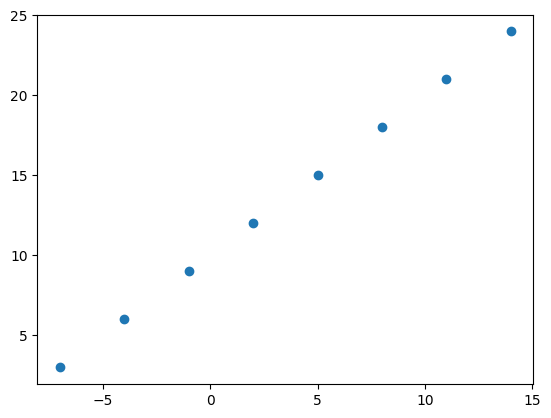

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(x,y);

In [ ]:
house_info.shape

TensorShape([3])

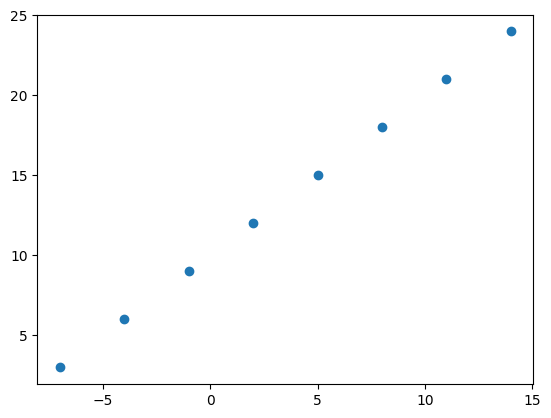

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(x,y);

Our goal here will be to use X to predict y.

So our input will be X and our output will be y.

In [ ]:
# Take a single example of x

input_shape = x[0].shape

# Take a single example of y

output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.



In [ ]:
# Let's take a look at the single examples invidually
x[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: making sure your input and outputs are in the correct shape.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

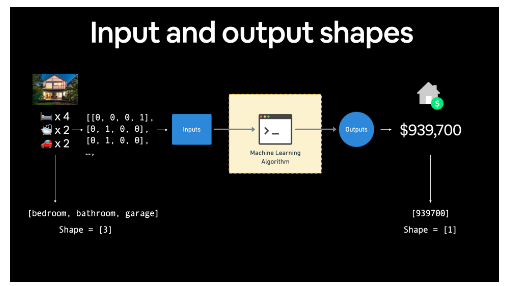
If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.


# **Steps in modelling with TensorFlow**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).


Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

# **About API**

In keras to biult a model we need APIs wchich can take input & give output .

There are 2 types of API
1. Functinal API
2. Sequential API

a) **Functional API:**
The Keras functional API is a way to create models that are more flexible than the sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs. The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers.

b) **Sequential API:**
Sequential API allows you to create models layer-by-layer by stacking them. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

**Difference between Functional API V/s Sequential API:-**

Keras functional API provides a more flexible way to build a deep learning model. It allows sharing layers and also allows to define multiple input and outputs to model. Unlike the sequential API, we need to define the standalone Input layer that specifies the shape of input data.
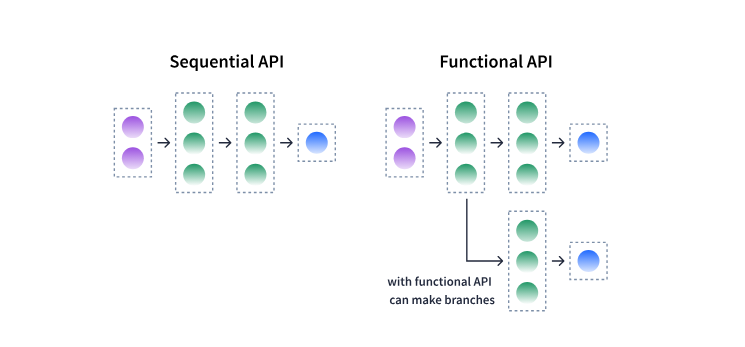



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss=tf.keras.losses.mae,# mae is short form of mean absoulate error
             optimizer=tf.keras.optimizers.SGD(),# SGD is sort form for stochastic gradient decent
              metrics = ["mae"])

#Fit the model
#model.fit(x,y,epochs = 5)# this will break with TensorFlow
model.fit(tf.expand_dims(x, axis=-1),y,epochs = 5)


Epoch 1/5
1/1 [==============================] - 1s 555ms/step - loss: 12.6129 - mae: 12.6129
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 12.4804 - mae: 12.4804
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 12.3479 - mae: 12.3479
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 12.2154 - mae: 12.2154
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 12.0829 - mae: 12.0829


# **Improving a model**
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model **- perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

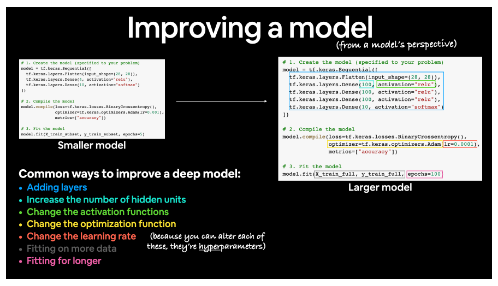

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

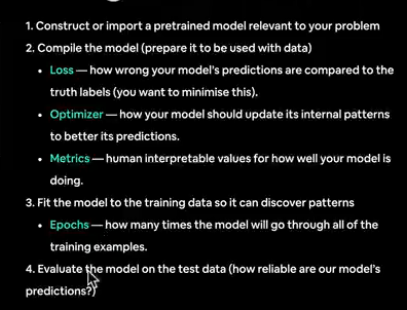


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss=tf.keras.losses.mae,# mae is short form of mean absoulate error
             optimizer=tf.keras.optimizers.SGD(),# SGD is sort form for stochastic gradient decent
              metrics = ["mae"])

#Fit the mdel
#model.fit(x,y,epochs = 5)# this will break with TensorFlow
model.fit(tf.expand_dims(x,axis=-1),y,epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 385ms/step - loss: 9.4964 - mae: 9.4964
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 9.3639 - mae: 9.3639
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2314 - mae: 9.2314
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0989 - mae: 9.0989
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9664 - mae: 8.9664
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8339 - mae: 8.8339
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7014 - mae: 8.7014
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5689 - mae: 8.5689
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.4364 - mae: 8.4364
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3039 - mae: 8.3039
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - l

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense( 100, activation = "relu"),
    tf.keras.layers.Dense(1)]
)

#Compile the model
model.compile(loss=tf.keras.losses.mae,# mae is short form of mean absoulate error
             optimizer=tf.keras.optimizers.SGD(),# SGD is sort form for stochastic gradient decent
              metrics = ["mae"])

#Fit the mdel
#model.fit(x,y,epochs = 5)# this will break with TensorFlow
model.fit(tf.expand_dims(x,axis=-1),y,epochs = 100)


Epoch 1/100
1/1 [==============================] - 1s 775ms/step - loss: 13.6821 - mae: 13.6821
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.1763 - mae: 13.1763
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 12.6715 - mae: 12.6715
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1699 - mae: 12.1699
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6644 - mae: 11.6644
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1558 - mae: 11.1558
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6377 - mae: 10.6377
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0961 - mae: 10.0961
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.5332 - mae: 9.5332
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9401 - mae: 8.9401
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# Remind ourselves of what X and y are
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:

# Try and predict what y would be if X was 17.0
model.predict([17.0])

1/1 [==============================] - 0s 113ms/step


array([[31.186375]], dtype=float32)

# **Visualize, visualize, visualize**
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
The training of a model - how does a model perform while it learns?
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?
Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [ ]:
#Leat's make a bigger dataset
x = np.arange(-100,100,4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
#same result as above
y = x+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# **Split data into training/test set**
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

In [ ]:
# Check how many samples we have
len(x)

50

In [ ]:
#split the data into train & test sets
x_train = x[:30]
y_train = y[:30]

x_test = x[30:]
y_test = y[30:]

len(x_train),len(x_test)

(30, 20)

In [ ]:
len(y_train),len(y_test)

(30, 20)

# **Visualizing the data**
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

 **figsize=(10, 7):**

 This is an argument passed to the figure() function, specifying the size of the figure in inches. In this case, it's setting the width to 10 inches and the height to 7 inches. You can adjust these values to control the dimensions of your plot.

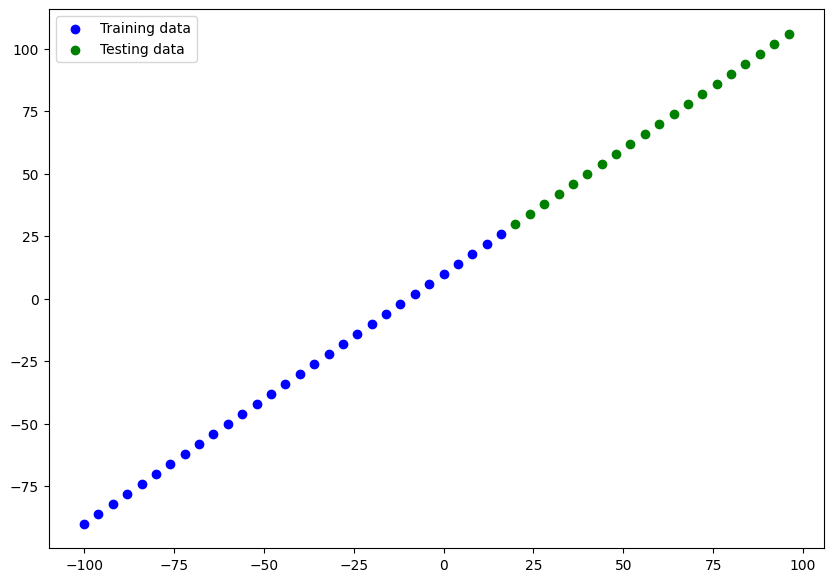

In [ ]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(x_train,y_train, c='b', label= 'Training data')
# plot test data in green
plt.scatter(x_test, y_test, c='g', label = 'Testing data')
#slow the plot
plt.legend();

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               200       
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Calling summary()** on our model shows us the layers it contains, the output shape and the number of parameters.

**Total params** - total number of parameters in the model.

**Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).


In [ ]:
model.fit(x_train, y_train, epochs = 100, verbose=0)# verbose controls how much gets output

In [ ]:
# Check the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               200       
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=[1])])

#Compile the model
model.compile(loss=tf.keras.losses.mae,# mae is short form of mean absoulate error
             optimizer=tf.keras.optimizers.SGD(),# SGD is sort form for stochastic gradient decent
              metrics = ["mae"])


In [ ]:

# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 17ms/step - loss: 5.1873 - mae: 5.1873
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1867 - mae: 5.1867
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1863 - mae: 5.1863
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1865 - mae: 5.1865
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 5.1864 - mae: 5.1864
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1860 - mae: 5.1860
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1854 - mae: 5.1854
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 5.1849 - mae: 5.1849
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1851 - mae: 5.1851
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 5.1850 - mae: 5.1850
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss:

In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f51f2a07730>>

Alongside summary, you can also view a 2D plot of the model using plot_model().

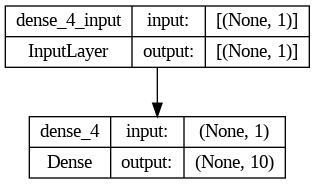

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes =True)

In [ ]:
#creating a layers as same as before

model = tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=[1],name="input_layers"),
                             tf.keras.layers.Dense(1,name="Output_layers")],name= "model1")
model.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

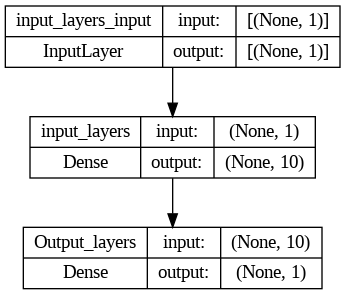

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes =True)

In [ ]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 10)                20        
                                                                 
 Output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
